In [1]:
print("START ETL")
# Первые этапы показаны лишь для ознакомления !!!
# Выборка с сайта ftp.zakupki.gov.ru
# После того как разведочный анализ показал, что выборка имеет ряд ошибок - пропуски, разное количество колонок у строк и тд.
# Было принято решение привязываться к индексам колонок, а именно 0 - это код ОКПД-2, 1 - это текстовое описание

# Первые этапы показаны лишь для ознакомления !!!

# from re import findall

# import pandas as pd

# DEFAULT_VALUE = "<НЕ ОПРЕДЕЛЕНО>"

# MAP_GROUP_CODE = {
#     "A": {
#         "01": "Продукция и услуги сельского хозяйства и охоты",
#         "1": "Продукция и услуги сельского хозяйства и охоты",
#         "2": "Продукция лесоводства, лесозаготовок и связанные с этим услуги",
#         "02": "Продукция лесоводства, лесозаготовок и связанные с этим услуги",
#         "3": "Рыба и прочая продукция рыболовства и рыбоводства; услуги, связанные с рыболовством и рыбоводством",
#         "03": "Рыба и прочая продукция рыболовства и рыбоводства; услуги, связанные с рыболовством и рыбоводством",
#     },
#     "B": {
#         "05": "Уголь",
#         "5": "Уголь",
#         "6": "Нефть и газ природный",
#         "7": "Руды металлические",
#         "8": "Продукция горнодобывающих производств прочая",
#         "9": "Услуги в области добычи полезных ископаемых",
#         "06": "Нефть и газ природный",
#         "07": "Руды металлические",
#         "08": "Продукция горнодобывающих производств прочая",
#         "09": "Услуги в области добычи полезных ископаемых",
#     },
#     "C": {
#         "10": "Продукты пищевые",
#         "11": "Напитки",
#         "12": "Изделия табачные",
#         "13": "Текстиль и изделия текстильные",
#         "14": "Одежда",
#         "15": "Кожа и изделия из кожи",
#         "16": "Древесина и изделия из дерева и пробки, кроме мебели; изделия из соломки и материалов для плетения",
#         "17": "Бумага и изделия из бумаги",
#         "18": "Услуги печатные и услуги по копированию звуко- и видеозаписей, а также программных средств",
#         "19": "Кокс и нефтепродукты",
#         "20": "Вещества химические и продукты химические",
#         "21": "Средства лекарственные и материалы, применяемые в медицинских целях",
#         "22": "Изделия резиновые и пластмассовые",
#         "23": "Продукты минеральные неметаллические прочие",
#         "24": "Металлы основные",
#         "25": "Изделия металлические готовые, кроме машин и оборудования",
#         "26": "Оборудование компьютерное, электронное и оптическое",
#         "27": "Оборудование электрическое",
#         "28": "Машины и оборудование, не включенные в другие группировки",
#         "29": "Средства автотранспортные, прицепы и полуприцепы",
#         "30": "Средства транспортные и оборудование, прочие",
#         "31": "Мебель",
#         "32": "Изделия готовые прочие",
#         "33": "Услуги по ремонту и монтажу машин и оборудования",
#     },
#     "D": {"35": "Электроэнергия, газ, пар и кондиционирование воздуха"},
#     "E": {
#         "36": "Вода природная; услуги по очистке воды и водоснабжению",
#         "37": "Услуги по водоотведению; шлам сточных вод",
#         "38": "Услуги по сбору, обработке и удалению отходов; услуги по утилизации отходов",
#         "39": "Услуги по рекультивации и прочие услуги по утилизации отходов",
#     },
#     "F": {
#         "41": "Здания и работы по возведению зданий",
#         "42": "Сооружения и строительные работы в области гражданского строительства",
#         "43": "Работы строительные специализированные",
#     },
#     "G": {
#         "45": "Услуги по оптовой и розничной торговле и услуги по ремонту автотранспортных средств и мотоциклов",
#         "46": "Услуги по оптовой торговле, кроме оптовой торговли автотранспортными средствами и мотоциклами",
#         "47": "Услуги по розничной торговле, кроме розничной торговли автотранспортными средствами и мотоциклами",
#     },
#     "H": {
#         "49": "Услуги сухопутного и трубопроводного транспорта",
#         "50": "Услуги водного транспорта",
#         "51": "Услуги воздушного и космического транспорта",
#         "52": "Услуги по складированию и вспомогательные транспортные услуги",
#         "53": "Услуги почтовой связи и услуги курьерские",
#     },
#     "I": {
#         "55": "Услуги по предоставлению мест для временного проживания",
#         "56": "Услуги общественного питания",
#     },
#     "J": {
#         "58": "Услуги издательские",
#         "59": "Услуги по производству кинофильмов, видеофильмов и телевизионных программ, звукозаписей и изданию музыкальных записей",
#         "60": "Услуги в области теле- и радиовещания",
#         "61": "Услуги телекоммуникационные",
#         "62": "Продукты программные и услуги по разработке программного обеспечения; консультационные и аналогичные услуги в области информационных технологий",
#         "63": "Услуги в области информационных технологий",
#     },
#     "K": {
#         "64": "Услуги финансовые, кроме услуг по страхованию и пенсионному обеспечению",
#         "65": "Услуги по страхованию, перестрахованию и негосударственному пенсионному обеспечению, кроме обязательного социального обеспечения",
#         "66": "Услуги вспомогательные, связанные с услугами финансового посредничества и страхования",
#     },
#     "L": {"68": "Услуги по операциям с недвижимым имуществом"},
#     "M": {
#         "69": "Услуги юридические и бухгалтерские",
#         "70": "Услуги головных офисов; услуги консультативные в области управления предприятием",
#         "71": "Услуги в области архитектуры и инженерно-технического проектирования, технических испытаний, исследований и анализа",
#         "72": "Услуги и работы, связанные с научными исследованиями и экспериментальными разработками",
#         "73": "Услуги рекламные и услуги по исследованию конъюнктуры рынка",
#         "74": "Услуги профессиональные, научные и технические, прочие",
#         "75": "Услуги ветеринарные",
#     },
#     "N": {
#         "77": "Услуги по аренде и лизингу",
#         "78": "Услуги по трудоустройству и подбору персонала",
#         "79": "Услуги туристических агентств, туроператоров и прочие услуги по бронированию и сопутствующие им услуги",
#         "80": "Услуги по обеспечению безопасности и проведению расследований",
#         "81": "Услуги по обслуживанию зданий и территорий",
#         "82": "Услуги в области административного, хозяйственного и прочего вспомогательного обслуживания",
#     },
#     "O": {
#         "84": "Услуги в области государственного управления и обеспечения военной безопасности, услуги в области обязательного социального обеспечения"
#     },
#     "P": {"85": "Услуги в области образования"},
#     "Q": {
#         "86": "Услуги в области здравоохранения",
#         "87": "Услуги по предоставлению ухода с обеспечением проживания",
#         "88": "Услуги социальные без обеспечения проживания",
#     },
#     "R": {
#         "90": "Услуги в области творчества, искусства и развлечений",
#         "91": "Услуги библиотек, архивов, музеев и прочие услуги в области культуры",
#         "92": "Услуги по организации и проведению азартных игр и заключению пари, лотерей",
#         "93": "Услуги, связанные со спортом, и услуги по организации развлечений и отдыха",
#     },
#     "S": {
#         "94": "Услуги общественных организаций и прочих некоммерческих организаций",
#         "95": "Услуги по ремонту компьютеров, предметов личного потребления и бытовых товаров",
#         "96": "Услуги персональные прочие",
#     },
#     "T": {
#         "97": "Услуги домашних хозяйств с наемными работниками",
#         "98": "Продукция и различные услуги частных домашних хозяйств для собственных нужд",
#     },
#     "U": {"99": "Услуги, предоставляемые экстерриториальными организациями и органами"},
# }


# def valid_okpd(value: str) -> bool:
#    return (
#        value != DEFAULT_VALUE
#        and value.replace(".", "").isdigit()
#        and bool(findall(r"^\d{1,2}\.\d{1,2}$", value))
#    )


# def valid_text(value: str) -> bool:
#    return value != DEFAULT_VALUE and not value.replace(".", "").isdigit() and len(value) >= 3


# def extract_draft_data(path: str, new_path: str, chunk_size: int) -> None:
# names = list(range) - что бы компенсировать разное количетсво колонок на строку
#    for chunk in pd.read_csv(path, chunksize=chunk_size, names=list(range(300))):
#        chunk = chunk.dropna(axis=1, how="all")
#        chunk[1] = chunk[1].astype(str)
#        chunk[0] = chunk[0].astype(str)
# Проверка валидности ячеек
#        chunk = chunk[chunk[1].apply(valid_text)]
#        chunk = chunk[chunk[0].apply(valid_okpd)]
# Устанавливаем сразу код ОКПД-2 первого уровня, а именно его буквенную форму
#        for k, v in MAP_GROUP_CODE.items():
#            for i in v:
#                mask = chunk[0].str.split(".").str[0] == str(i)
#                chunk.loc[mask, 0] = k
#        chunk = chunk[[0, 1]]
#        chunk = chunk.drop_duplicates()
#
#        if not chunk.empty:
#            chunk.to_csv(
#                new_path,
#                mode="a",
#                header=False,
#                index=False,
#                encoding="utf-8",
#            )


# def extract_uniq_data(path: str, new_path: str) -> None:
#    header = ["text", "code"]
#    draft_data = pd.read_csv(path, names=header)
#    draft_data = draft_data.drop_duplicates()
#    counts = draft_data["code"].value_counts()
#    draft_data = draft_data[draft_data["code"].isin(counts[counts >= 100].index)]

#    if not draft_data.empty:
#        draft_data.to_csv(
#            new_path,
#            mode="a",
#            header=header,
#            index=False,
#            encoding="utf-8",
#        )

# Пример ETL
# NEW_DATA_DIRNAME = "tmp"
# etl_draft = os_join(NEW_DATA_DIRNAME, "draft_data.csv")
# etl_clear = os_join(NEW_DATA_DIRNAME, "clear_data.csv")
# extract_draft_data(path=path, new_path=etl_draft, chunk_size=1_000_000)
# extract_uniq_data(path=etl_draft, new_path=etl_clear)

print("END ETL")

START ETL
END ETL


In [2]:
# Тестирование и обучение модели
from enum import StrEnum
from os.path import join as os_join

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import stanza
from catboost import CatBoostClassifier
from matplotlib.patches import Rectangle
from nltk import RegexpTokenizer, download, word_tokenize
from nltk.corpus import stopwords
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from stanza import Pipeline

stanza.download("ru")

LEMMATIZER = None
STOP_WORDS = None

for i in ("punkt_tab", "wordnet", "stopwords"):
    download(i, download_dir=".venv/nltk_data")


def init_nltk() -> None:
    global STOP_WORDS

    if not STOP_WORDS:
        STOP_WORDS = set(stopwords.words("russian"))
        STOP_WORDS.update(
            (
                "маоу",
                "сош",
                "окпд",
                "для",
                "нужд",
                "гапоу",
                "рх",
                "спт",
            )
        )


def init_stanza() -> None:
    global LEMMATIZER

    if not LEMMATIZER:
        LEMMATIZER = Pipeline("ru")


def regex_tokenizer(sent: str):
    return RegexpTokenizer(r"\w+").tokenize(sent)


def lemmatize(text: str) -> str:
    doc = LEMMATIZER(text)
    return " ".join(w.lemma for i in doc.sentences for w in i.words)


def preprocess_lemmatize(df: DataFrame) -> DataFrame:
    init_stanza()
    df["clean_text"] = df["clean_text"].apply(lemmatize)
    return df


def clean_text(text: str):
    words = regex_tokenizer(sent=text.lower().strip())
    words = word_tokenize(" ".join(words), language="russian")
    words = [word for word in words if len(word) > 2 and word not in STOP_WORDS]
    return " ".join(words)


def preprocess_dataframe(df: DataFrame) -> DataFrame:
    init_nltk()
    df["clean_text"] = df["text"].apply(clean_text)
    return df


class ModelTypes(StrEnum):
    RANDOM_FOREST = "random_forest"
    LOGISTIC_REGRESSION = "logistic_regression"
    CAT_BOOST = "cat_boost"


class CustomML:
    def __init__(self, model_type: ModelTypes, df: DataFrame) -> None:
        self.model_type = model_type
        self.vecrotize = TfidfVectorizer()
        self.metrics = {}
        self.model_init()
        self.df = df.copy()

    def model_init(self) -> None:
        match self.model_type:
            case ModelTypes.RANDOM_FOREST:
                self.model = RandomForestClassifier(n_estimators=100, random_state=42)
            case ModelTypes.LOGISTIC_REGRESSION:
                self.model = LogisticRegression()
            case ModelTypes.CAT_BOOST:
                self.model = CatBoostClassifier(
                    iterations=200,
                    learning_rate=0.1,
                    depth=3,
                    verbose=0,
                )

    def filtered_fathest_index(self, masks: list[str], df: DataFrame, max_qty: int) -> DataFrame:
        for mask in masks:
            df_mask = df["code"] == mask
            tf_df_draft = df.loc[df_mask].copy()
            df = df.drop(df.loc[df_mask].index).reset_index(drop=True)
            tfidf_matrix = self.vecrotize.fit_transform(tf_df_draft["clean_text"])
            distance = cosine_distances(tfidf_matrix)
            mean_dist = distance.mean(axis=1)
            unique_indices = np.argsort(mean_dist)[::-1][:max_qty]
            df_new = tf_df_draft.iloc[unique_indices]
            df = pd.concat([df, df_new], ignore_index=True)

        return df

    def clear_df(self, min_qty: int, grpoup_by_qty: int, farthest_name_classes: list[str]) -> None:
        df = preprocess_dataframe(df=self.df)
        df = self.filtered_fathest_index(
            masks=farthest_name_classes, df=df, max_qty=int(grpoup_by_qty)
        )
        counts = df["code"].value_counts()
        self.df = df.loc[df["code"].isin(counts.loc[counts >= min_qty].index)].reset_index(
            drop=True
        )
        self.df = preprocess_lemmatize(df=self.df)

    def save_heat_map(self, y_test, predict_x_test, classes, data_type):
        cm = confusion_matrix(y_test, predict_x_test, labels=classes)
        max_value = cm.max()
        background = np.zeros_like(cm)
        np.fill_diagonal(background, 1)
        ax = sns.heatmap(
            cm,
            annot=True,
            cbar=False,
            fmt="d",
            cmap="Blues",
            xticklabels=classes,
            yticklabels=classes,
        )
        mask = background == 0
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                if mask[i][j] and cm[i][j]:
                    intensity = cm[i][j] / max_value
                    ax.add_patch(
                        Rectangle((j, i), 1, 1, color=(1, 1 - intensity, 1 - intensity, 0.8))
                    )

        plt.title("Матрица ошибок")
        plt.xlabel("Классы")
        plt.show()
        plt.close()

    def fit(self):
        pipline = make_pipeline(self.vecrotize, self.model)
        x_train, x_test, y_train, y_test = train_test_split(
            self.df["clean_text"], self.df["code"], test_size=0.25, random_state=42
        )
        pipline.fit(x_train, y_train)
        predict_x_test = pipline.predict(x_test)
        predict_x_train = pipline.predict(x_train)
        self.metrics["Accuracy"] = pipline.score(x_test, y_test)
        self.metrics["Accuracy_train"] = pipline.score(x_train, y_train)
        self.metrics["Classification_report"] = classification_report(y_test, predict_x_test)
        self.metrics["Classification_report_train"] = classification_report(
            y_train, predict_x_train
        )
        self.save_heat_map(
            y_test=y_test,
            predict_x_test=predict_x_test,
            classes=pipline.classes_,
            data_type="test",
        )
        self.save_heat_map(
            y_test=y_train,
            predict_x_test=predict_x_train,
            classes=pipline.classes_,
            data_type="train",
        )

        return pipline

    def predict(self) -> str:
        df = preprocess_dataframe(df=self.df)
        df = preprocess_lemmatize(df=df)
        res = self.model.predict(self.vecrotize.transform(df["clean_text"]))

        match self.model_type:
            case ModelTypes.CAT_BOOST:
                answer = res[0][0]
            case ModelTypes.LOGISTIC_REGRESSION | ModelTypes.RANDOM_FOREST:
                answer = res[0]

        return answer

    def save_model(self) -> None:
        joblib.dump(os_join(MODELS_PATH, self.vecrotize, f"{self.model_type}.vec"))
        match self.model_type:
            case ModelTypes.CAT_BOOST:
                self.model.save_model(fname=os_join(MODELS_PATH, f"{self.model_type}.cbm"))
            case ModelTypes.LOGISTIC_REGRESSION | ModelTypes.RANDOM_FOREST:
                joblib.dump(self.model, os_join(MODELS_PATH, f"{self.model_type}.pkl"))

    def load_model(self) -> None:
        self.vecrotize = joblib.load(os_join(MODELS_PATH, f"{self.model_type}.vec"))
        match self.model_type:
            case ModelTypes.CAT_BOOST:
                self.model.load_model(fname=os_join(MODELS_PATH, f"{self.model_type}.cbm"))
            case ModelTypes.LOGISTIC_REGRESSION | ModelTypes.RANDOM_FOREST:
                self.model = joblib.load(os_join(MODELS_PATH, f"{self.model_type}.pkl"))

2025-07-16 21:21:29 INFO: Downloaded file to C:\Users\i.grubov\stanza_resources\resources.json
2025-07-16 21:21:29 INFO: Downloading default packages for language: ru (Russian) ...
2025-07-16 21:21:32 INFO: File exists: C:\Users\i.grubov\stanza_resources\ru\default.zip
2025-07-16 21:21:42 INFO: Finished downloading models and saved to C:\Users\i.grubov\stanza_resources
[nltk_data] Downloading package punkt_tab to .venv/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to .venv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to .venv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2025-07-16 21:21:43 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-16 21:21:44 INFO: Downloaded file to C:\Users\i.grubov\stanza_resources\resources.json
2025-07-16 21:21:51 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2025-07-16 21:21:51 INFO: Using device: cpu
2025-07-16 21:21:51 INFO: Loading: tokenize
2025-07-16 21:21:56 INFO: Loading: pos
2025-07-16 21:22:01 INFO: Loading: lemma
2025-07-16 21:22:06 INFO: Loading: depparse
2025-07-16 21:22:07 INFO: Loading: ner
2025-07-16 21:22:17 INFO: Done loading processors!


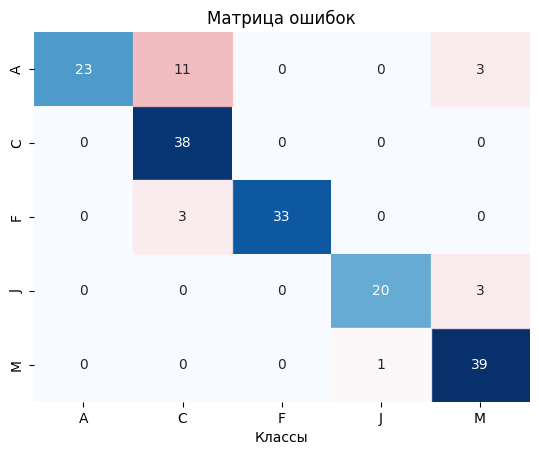

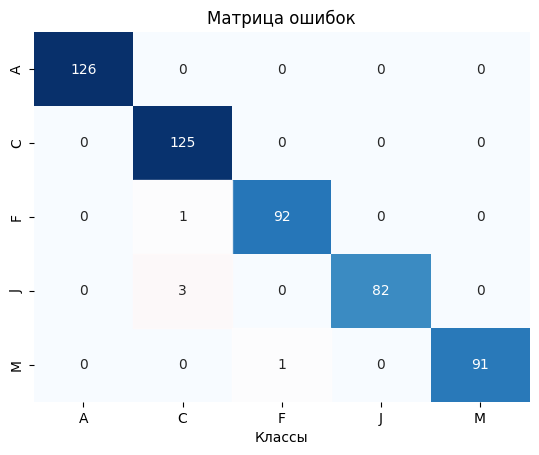


Точность модели LogisticRegression на тесте: 88 процентов
Отчет модели LogisticRegression               precision    recall  f1-score   support

           A       1.00      0.62      0.77        37
           C       0.73      1.00      0.84        38
           F       1.00      0.92      0.96        36
           J       0.95      0.87      0.91        23
           M       0.87      0.97      0.92        40

    accuracy                           0.88       174
   macro avg       0.91      0.88      0.88       174
weighted avg       0.90      0.88      0.88       174


Точность модели LogisticRegression при обучении: 99 процентов
Отчет модели LogisticRegression               precision    recall  f1-score   support

           A       1.00      1.00      1.00       126
           C       0.97      1.00      0.98       125
           F       0.99      0.99      0.99        93
           J       1.00      0.96      0.98        85
           M       1.00      0.99      0.99        92


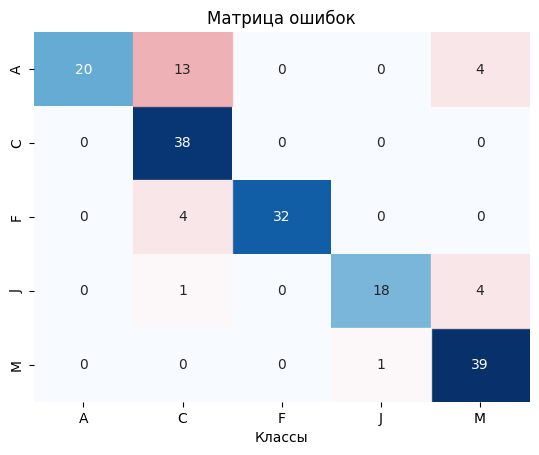

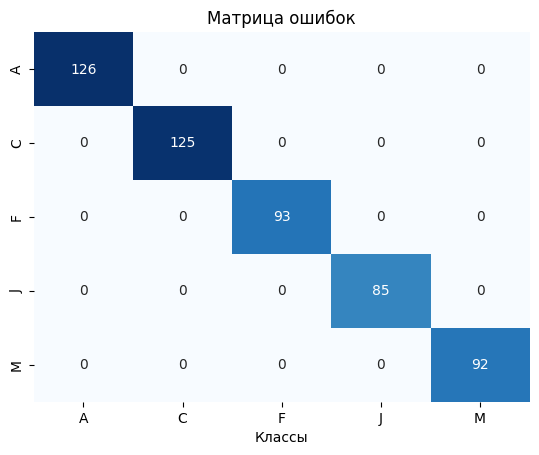


Точность модели RandomForestClassifier на тесте: 84 процентов
Отчет модели RandomForestClassifier               precision    recall  f1-score   support

           A       1.00      0.54      0.70        37
           C       0.68      1.00      0.81        38
           F       1.00      0.89      0.94        36
           J       0.95      0.78      0.86        23
           M       0.83      0.97      0.90        40

    accuracy                           0.84       174
   macro avg       0.89      0.84      0.84       174
weighted avg       0.88      0.84      0.84       174


Точность модели RandomForestClassifier при обучении: 100 процентов
Отчет модели RandomForestClassifier               precision    recall  f1-score   support

           A       1.00      1.00      1.00       126
           C       1.00      1.00      1.00       125
           F       1.00      1.00      1.00        93
           J       1.00      1.00      1.00        85
           M       1.00      1.00    

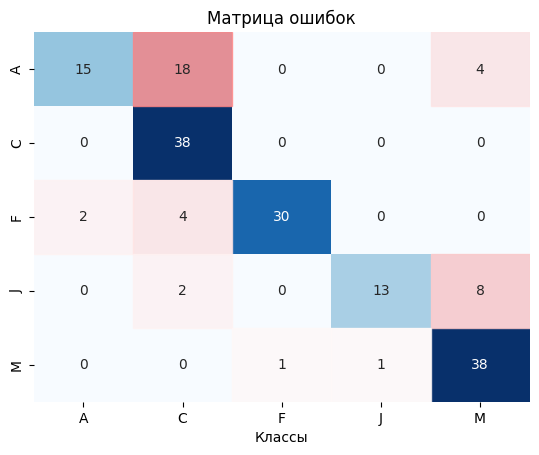

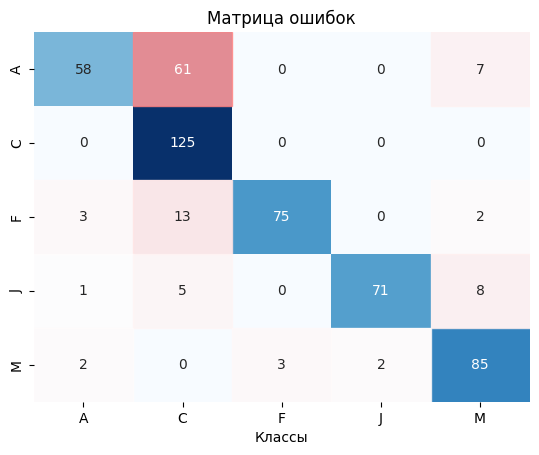


Точность модели CatBoostClassifier на тесте: 77 процентов
Отчет модели CatBoostClassifier               precision    recall  f1-score   support

           A       0.88      0.41      0.56        37
           C       0.61      1.00      0.76        38
           F       0.97      0.83      0.90        36
           J       0.93      0.57      0.70        23
           M       0.76      0.95      0.84        40

    accuracy                           0.77       174
   macro avg       0.83      0.75      0.75       174
weighted avg       0.82      0.77      0.76       174


Точность модели CatBoostClassifier при обучении: 79 процентов
Отчет модели CatBoostClassifier               precision    recall  f1-score   support

           A       0.91      0.46      0.61       126
           C       0.61      1.00      0.76       125
           F       0.96      0.81      0.88        93
           J       0.97      0.84      0.90        85
           M       0.83      0.92      0.88        92


In [3]:
# Для этого этапа в ознакомительных целях был подготовлен датасет с параметрами

df = pd.read_csv("data/test.csv", names=["text", "code"])

log_reg = CustomML(df=df, model_type=ModelTypes.LOGISTIC_REGRESSION)
random_forest = CustomML(df=df, model_type=ModelTypes.RANDOM_FOREST)
cat_boost = CustomML(df=df, model_type=ModelTypes.CAT_BOOST)


for model, name in (
    (log_reg, "LogisticRegression"),
    (random_forest, "RandomForestClassifier"),
    (cat_boost, "CatBoostClassifier"),
):
    # Все параметры подобраны после разведочного анализа набора данных
    # farthest_name_classes - классы в которых выборка больше 163,
    # они пройдут сортировку по косинусному расстоянию и будут отобраны только 163 описания(с большим косинусным расстоянием)
    # min_qty - минимальное количество описания для попадания класса в итоговую выборку для обучения модели
    model.clear_df(min_qty=100, grpoup_by_qty=163, farthest_name_classes=["C", "A"])
    model.fit()
    print()
    print(
        f"Точность модели {name} на тесте: {int(round(model.metrics['Accuracy'], 2) * 100)} процентов"
    )
    print(f"Отчет модели {name} {model.metrics['Classification_report']}")
    print()
    print(
        f"Точность модели {name} при обучении: {int(round(model.metrics['Accuracy_train'], 2) * 100)} процентов"
    )
    print(f"Отчет модели {name} {model.metrics['Classification_report_train']}")
    print()